# 05_CDA(Confirmatory Data Analysis)

- 어떤 현상이 '우연'인지 그렇지 않은지를 확인하기 위함

In [4]:
import scipy.stats as spst
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Comparative Type Test

### One Sample T-Test
- 샘플 A의 평균이 x와 다른가? - p-value가 낮으면 '다르다!'
- 귀무가설 : 같다
- 대립가설 : 다르다

In [6]:
spst.ttest_1samp(A, popmean = 5)

Ttest_1sampResult(statistic=5.810272049873847, pvalue=1.013619414110334e-08)

**pvalue** : 1.013619414110334e-08
* 정직한 설명 : 귀무가설이 참이라는 전제하에 이렇게 데이터가 관찰될 확률이 0.0....01%정도라는 뜻이다.
* 발칙한 설명 : 기존 배너보다 나을 확률이 99%를 넘는다는 뜻이다.

**statistic** : 5.810272049873847  
* 신호/노이즈가 5.8, 즉 신호가 노이즈보다 5.8배 높다는 뜻

### Two Sample T-Test
- A와 B가 다른가? p-value가 낮으면 '다르다'!

In [13]:
spst.ttest_ind(A, B, equal_var=False) # equal_var는 등분산 여부인데, 모르면 False

Ttest_indResult(statistic=-8.566294220690699, pvalue=1.1454883039955057e-17)

### Paired T-Test
- 한 집단에서 전-후 비교(Before-After) - 당연히 p-value 낮으면 다른 것

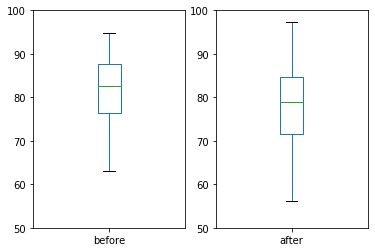

In [17]:
plt.subplot(1,2,1)
weight['before'].plot(kind = 'box', ylim = (50,100))

plt.subplot(1,2,2)
weight['after'].plot(kind = 'box', ylim = (50,100))

In [19]:
spst.ttest_rel(before, after) # 얘가 Paried t-test

Ttest_relResult(statistic=5.755395332208213, pvalue=3.1221904501479888e-06)

In [22]:
before.mean() - after.mean()

3.5173255495705575

### ANOVA(Analysis of Variance)
**귀무가설 : A,B,C 다 똑같다**  
**대립가설 : A,B,C 중 '무언가 하나는' 다를 것이다.**

대립가설 조심, A, B, C 중 뭐가 다르고, 얼마나 다르고 등은 전혀 알 수 없다. 따로 계산해야 한다.

In [27]:
spst.f_oneway(A, B, C) # 얘가 ANOVA

F_onewayResult(statistic=3.98971736112853, pvalue=0.018537692867904416)

##### 정석적인 해석 : 귀무가설이 참일 때, 이러한 데이터가 관측될 확률은 1.85% 정도이다. (1.85%확률을 뚫고 이런 데이터가 관측될 수도 있다.)

발칙한 해석 : 뭔가 하나는 차이가 날 확률이 98%는 넘는다.

## Assosiative Type Test

### Correlation Coefficient
**귀무가설 : X와 Y는 상관이 없다.(상관계수 = 0)**  
**대립가설 : 상관계수가 0이 아니다.**
- X와 Y를 별도로 시각화 해 볼 것

In [31]:
spst.pearsonr(X, Y) # X와 Y의 상관계수와 p-value

(0.5907805070828731, 9.790270530287291e-11)

- 결과는 튜플로 나오는데

1. 튜플의 첫 번째 값 : 상관계수를 뜻한다. 두 데이터의 선형성의 정도를 나타낸다.
2. p-value는 상관계수가 우연에 의해 일어나진 않았는지 판단한다.
    * 귀무가설 : 상관 계수가 0이다.
    * 대립가설 : 상관 계수가 0이 아니다.

### 교차분석(Chisquare_test)

티셔츠 구매여부와 반바지 구매여부는 관계가.. 있을까?!  
**귀무가설 : 티셔츠 구매와 바지 구매는 별개이다.(독립이다)**  
**대립가설 : 티셔츠를 구매와 바지는 독립이 아니다.관련이 있다..**

In [40]:
# 고객별 셔츠와 바지의 구매 여부 데이터
data.head(10)

,shirts,pants
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0
5,0,0
6,1,1
7,1,0
8,0,1
9,0,1


In [41]:
# 데이터의 Crosstable
contingency = pd.crosstab(data['shirts'], data['pants'])
contingency

pants,0,1
shirts,,
0,416,269
1,116,199


In [49]:
chiresult = spst.chi2_contingency(contingency) # 카이제곱 검정

(48.56721121836466, 3.1916097752431966e-12, 1, array([[364.42, 320.58],
        [167.58, 147.42]]))

In [50]:
# 결과 : 튜플로 4개 값 출력됨
print("카이제곱통계량 : {}".format(chiresult[0]))
print("p-value : {:.20f}".format(chiresult[1]))
print("자유도 : {}".format(chiresult[2]))
print("기대 빈도 분할표: \n", chiresult[3] ) #귀무가설에 대한 기대빈도.

카이제곱통계량 : 48.56721121836466
p-value : 0.00000000000319160978
자유도 : 1
기대 빈도 분할표: 
 [[364.42 320.58]
 [167.58 147.42]]


- 유의수준 0.05 하에 p-value가 매우 낮으므로 두 집단간 차이가 있다(바지 구매는 셔츠 구매와 관련이 있다)
- pants 0과 pants 1 그룹을 비교했을 때 shirts 0, 1의 차이가 있다. pants가 0, 1, 2였다면 0, 1, 2에 따라 차이가 있다라고 해석할 수 있음